In [68]:
import pandas
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
raw = pandas.read_csv('/home/aalvarez/Downloads/owid-covid-data.csv')

In [31]:
raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63185,ZWE,Africa,Zimbabwe,2021-01-26,32004.0,358.0,475.571,1103.0,28.0,39.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
63186,ZWE,Africa,Zimbabwe,2021-01-27,32304.0,300.0,413.714,1122.0,19.0,34.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
63187,ZWE,Africa,Zimbabwe,2021-01-28,32646.0,342.0,371.286,1160.0,38.0,34.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
63188,ZWE,Africa,Zimbabwe,2021-01-29,32952.0,306.0,347.000,1178.0,18.0,30.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [98]:
esp = raw[raw['iso_code'] == 'CHE']

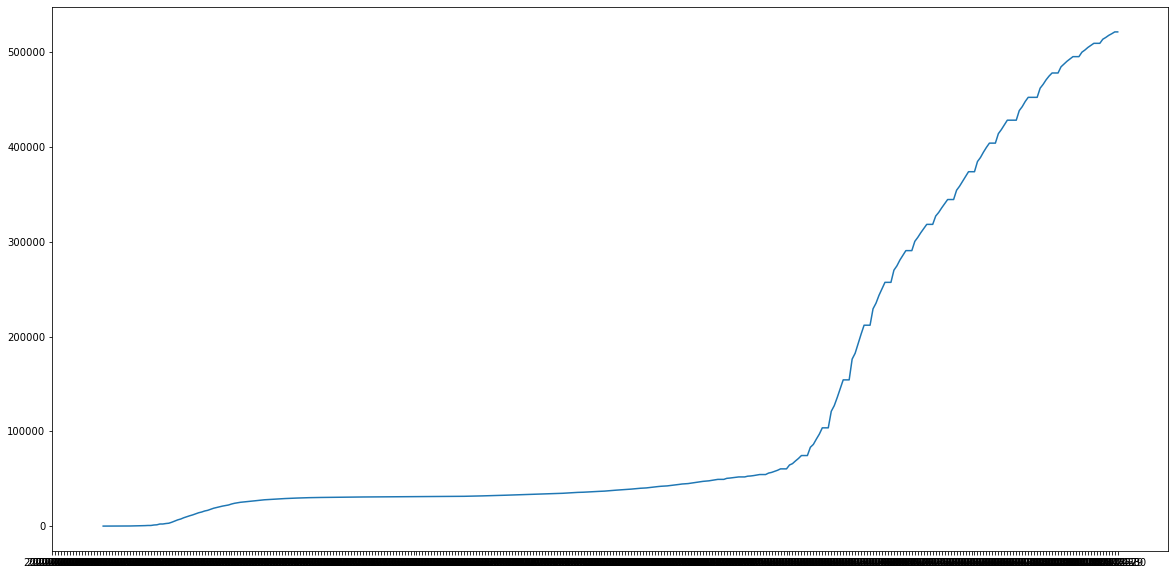

In [99]:
plt.figure()
plt.plot(esp['date'], esp['total_cases'])

In [100]:
months = dict()
for i, r in esp.iterrows():
    x = date.fromisoformat(r['date'])
    k = x.strftime("%Y-%m")
    if k not in months:
        months[k] = r['total_cases']
    elif r['total_cases'] > months[k]:
        months[k] = r['total_cases']
print(months.keys())

dict_keys(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01'])


In [111]:
v = np.array(list(months.values()))
v[np.isnan(v)] = 0
dmonth = np.diff(v, prepend=0).astype(np.int)
print(dmonth)

[     0      0  16605  12981   1276    852   3518   6945  11105 100969
 172821 125224  69024]


Text(0, 0.5, 'Infecciones')

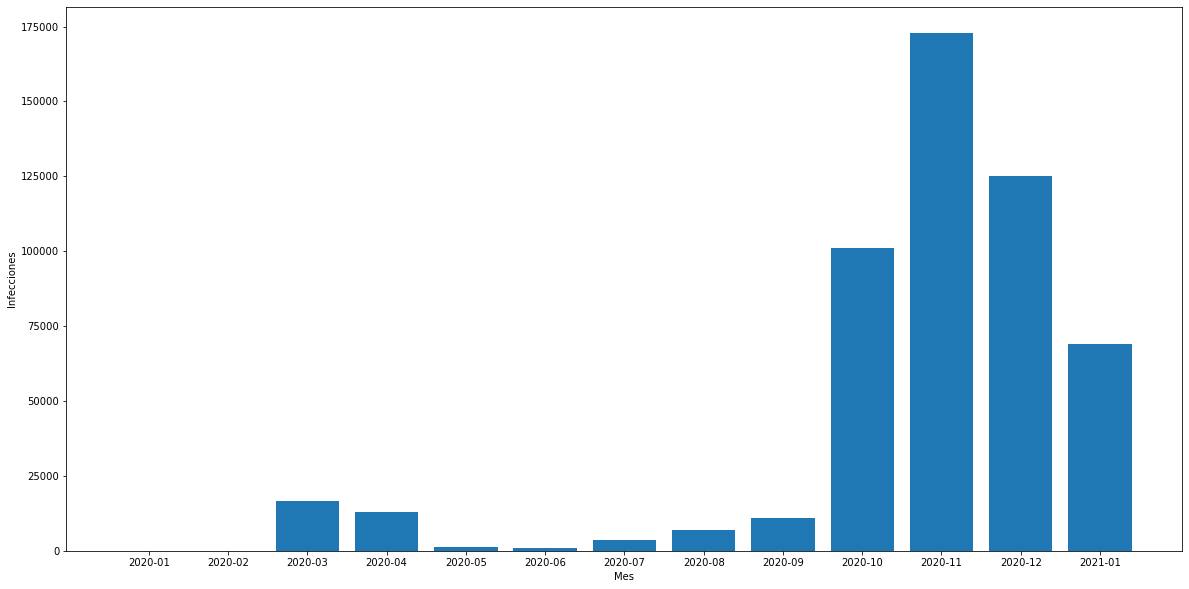

In [112]:
plt.figure()
plt.bar(list(months.keys()), dmonth)
plt.xlabel('Mes')
plt.ylabel('Infecciones')